In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab    
import json
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
import powerlaw

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;


In [2]:
business=pd.read_csv('yelp_academic_dataset_business.csv')

/Users/Wendy/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,4,7,17,26,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
new=[]
for index, columns in business.iterrows():
    new_categories = str(columns['categories']).lower()
    Id = columns['business_id']
    City = columns['city']
    Stars = columns['stars']
    State = columns['state']
    Review = columns['review_count']
    
    if "restaurant" in new_categories:
         new.append({"categories":new_categories,"business_id":Id,"state":State,"city":City,"stars":Stars})
        

In [4]:
business_restaurant=pd.DataFrame(new)

In [5]:
feature=['business_id','attributes.Noise Level','attributes.Wi-Fi','attributes.Price Range',
        'attributes.Good for Kids','attributes.Waiter Service','attributes.Take-out','attributes.Outdoor Seating','attributes.Parking.lot','attributes.Parking.street',
        'attributes.Parking.garage','attributes.Parking.valet','attributes.Parking.validated','attributes.Good For.dessert','attributes.Good For.latenight','attributes.Good For.brunch',
        'attributes.Good For.lunch','attributes.Good For.dinner','attributes.Good For.breakfast']
business_df=business[feature]
business_df.head()

,business_id,attributes.Noise Level,attributes.Wi-Fi,attributes.Price Range,attributes.Good for Kids,attributes.Waiter Service,attributes.Take-out,attributes.Outdoor Seating,attributes.Parking.lot,attributes.Parking.street,attributes.Parking.garage,attributes.Parking.valet,attributes.Parking.validated,attributes.Good For.dessert,attributes.Good For.latenight,attributes.Good For.brunch,attributes.Good For.lunch,attributes.Good For.dinner,attributes.Good For.breakfast
0,5UmKMjUEUNdYWqANhGckJw,average,NaN,1.0,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,UsFtqoBl7naz8AVUBZMjQQ,NaN,NaN,1.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cE27W9VPgO88Qxe4ol6y_g,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mVHrayjG3uZ_RLHkLj-AMg,average,no,2.0,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False
4,mYSpR_SLPgUVymYOvTQd_Q,NaN,NaN,NaN,True,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
business_one=pd.merge(business_restaurant,business_df,on='business_id') 
business_one.columns = ["business_id","categories","city","stars","state","Noise",
                       "Wi-Fi","Price","Kids","Waiter","Take-out","Outdoor-Seating","lot","street",
                       "garage","valet","validated",'dessert','latenight','brunch','lunch',
                       'dinner','breakfast']
business_one.head()

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Waiter,...,street,garage,valet,validated,dessert,latenight,brunch,lunch,dinner,breakfast
0,5UmKMjUEUNdYWqANhGckJw,"['fast food', 'restaurants']",Dravosburg,3.5,PA,average,NaN,1.0,True,False,...,False,False,False,False,False,False,False,False,False,False
1,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,4.5,PA,average,no,2.0,True,True,...,False,False,False,False,False,False,False,True,False,False
2,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,loud,free,1.0,False,True,...,False,False,False,False,False,False,False,False,True,False
3,wJr6kSA5dchdgOdwH6dZ2w,"['burgers', 'breakfast & brunch', 'american (t...",Carnegie,3.5,PA,NaN,NaN,1.0,True,True,...,False,False,False,False,False,False,False,False,False,False
4,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,4.0,PA,average,free,1.0,True,True,...,False,False,False,False,False,False,False,False,False,False


In [9]:
def get_park(park):
    lot,street,garage,valet,validated = park
    return True if lot+street+garage+valet+validated > 0 else False
def get_park_level(park):
    lot,street,garage,valet,validated = park
    return lot+street+garage+valet+validated 
def get_good_level(good):
    dessert,latenight,brunch,lunch,dinner,breakfast= good
    return dessert+latenight+brunch+lunch+dinner+breakfast 

# business_two['parking'] = business_two[['lot','street','garage','valet','validated']].apply(get_park,axis=1)
business_two['park_level'] = business_two[['lot','street','garage','valet','validated']].apply(get_park_level,axis=1)
business_two['good_level'] = business_two [['dessert','latenight','brunch','lunch','dinner','breakfast']].apply(get_good_level,axis=1)

/Users/Wendy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Wendy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
business_three = business_two.drop(['lot','street','garage','valet','validated','dessert','latenight','brunch','lunch','dinner','breakfast'],axis=1)

In [11]:
restaurant = business_three

In [12]:
def group_stars(value):
    if value <=3.5:
        return 0
    else:
        return 1

restaurant['stars'] = restaurant['stars'].apply(group_stars)


In [13]:
def new_noise(value):
    if value == "quiet":
        return 3
    elif value =="average":
        return 2
    elif value == "loud":
        return 1
    else:
        return 0
restaurant["Noise"] = restaurant["Noise"].apply(new_noise)
restaurant.head()

,business_id,categories,city,stars,state,Noise,Wi-Fi,Price,Kids,Waiter,Take-out,Outdoor-Seating,park_level,good_level
1,mVHrayjG3uZ_RLHkLj-AMg,"['bars', 'american (new)', 'nightlife', 'loung...",Braddock,1,PA,2,no,2.0,True,True,True,False,0,1
2,KayYbHCt-RkbGcPdGOThNg,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,1,PA,1,free,1.0,False,True,True,True,1,1
4,fNGIbpazjTRdXgwRY_NIXA,"['bars', 'american (traditional)', 'nightlife'...",Carnegie,1,PA,2,free,1.0,True,True,True,False,1,0
5,b9WZJp5L1RZr4F1nxclOoQ,"['breakfast & brunch', 'sandwiches', 'restaura...",Carnegie,1,PA,2,no,1.0,True,True,True,False,1,1
11,wqu7ILomIOPSduRwoWp4AQ,"['breakfast & brunch', 'american (traditional)...",Pittsburgh,0,PA,2,no,1.0,True,True,True,False,0,1


In [14]:
def new_wifi(value):
    if value == "no":
        return 1
    elif value =="paid":
        return 0
    else:
        return 2
    
restaurant["Wi-Fi"] = restaurant["Wi-Fi"].apply(new_wifi)

In [16]:
new_restaurant = restaurant.drop(["business_id","categories","city","state"],axis=1)
new_restaurant.head()

,stars,Noise,Wi-Fi,Price,Kids,Waiter,Take-out,Outdoor-Seating,park_level,good_level
1,1,2,1,2.0,True,True,True,False,0,1
2,1,1,2,1.0,False,True,True,True,1,1
4,1,2,2,1.0,True,True,True,False,1,0
5,1,2,1,1.0,True,True,True,False,1,1
11,0,2,1,1.0,True,True,True,False,0,1


In [17]:
x_train = new_restaurant.drop(["stars"],axis=1)
y_train = new_restaurant["stars"].ravel()
x_train.head()

,Noise,Wi-Fi,Price,Kids,Waiter,Take-out,Outdoor-Seating,park_level,good_level
1,2,1,2.0,True,True,True,False,0,1
2,1,2,1.0,False,True,True,True,1,1
4,2,2,1.0,True,True,True,False,1,0
5,2,1,1.0,True,True,True,False,1,1
11,2,1,1.0,True,True,True,False,0,1


In [18]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest.score(x_train, y_train)

acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

64.310000000000002

In [19]:
importances = random_forest.feature_importances_
importances

array([ 0.1848854 ,  0.10511594,  0.13477945,  0.06911804,  0.06421207,
        0.05476718,  0.08062997,  0.16054325,  0.14594872])

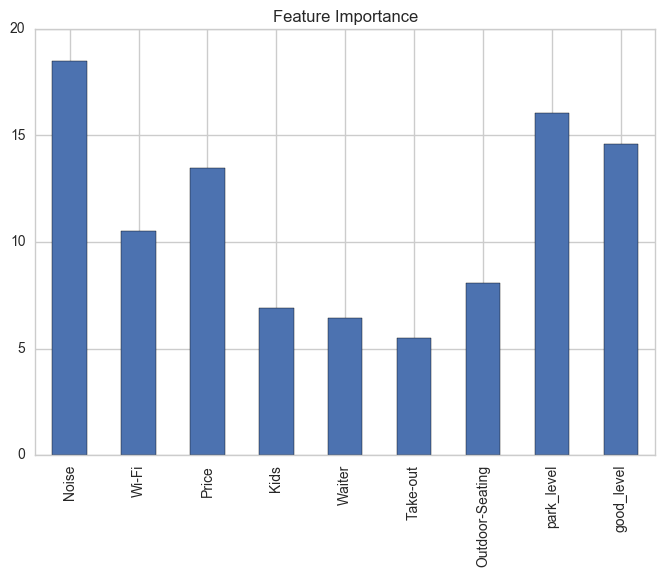

In [20]:
names=x_train.columns.values
pd.Series(importances*100, index=names).plot(kind="bar",title="Feature Importance")